In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

seed = 3

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Decide on columns and run pca, save transformed data

In [3]:
df = pd.read_csv('../bballref_data/scaled_2000_to_2020.csv', index_col=0)
df.shape

(6541, 71)

In [4]:
sorted(df.columns)

## Cols to drop

['age',
 'and1s_per_min',
 'ast_pct',
 'astd_pts_per_min',
 'avg_dist',
 'blk_pct',
 'bpm',
 'dbpm',
 'def_rtg',
 'drawn_shooting_per_min',
 'drb_pct',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_heave',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_heave',
 'fg3a_per_poss',
 'fg_dunk_per_min',
 'fg_pct',
 'fg_pct_00_03',
 'fg_pct_03_10',
 'fg_pct_10_16',
 'fg_pct_16_xx',
 'fg_pct_corner3',
 'fg_per_poss',
 'fga_per_poss',
 'fouls_offensive_per_min',
 'fouls_shooting_per_min',
 'ft_pct',
 'ft_per_poss',
 'fta_per_fga_pct',
 'fta_per_poss',
 'g',
 'gs',
 'height',
 'mp',
 'obpm',
 'off_rtg',
 'orb_pct',
 'own_shots_blk_per_min',
 'pct_ast_fg2',
 'pct_ast_fg3',
 'pct_c',
 'pct_fg3a_corner3',
 'pct_fga_00_03',
 'pct_fga_03_10',
 'pct_fga_10_16',
 'pct_fga_16_xx',
 'pct_fga_dunk',
 'pct_fga_fg3a',
 'pct_pf',
 'pct_pg',
 'pct_sf',
 'pct_sg',
 'per',
 'pf_per_poss',
 'plus_minus_net',
 'plus_minus_on',
 'pts_per_poss',
 'stl_pct',
 'tov_bad_pass_per_min',
 'tov_lost_ball_per_min',
 'tov_pct',

In [7]:
df = pd.read_csv('../bballref_data/scaled_2000_to_2020.csv', index_col=0)
drop_cols = ['age',
             'pct_c',
             'pct_pf',
             'pct_pg',
             'pct_sf',
             'pct_sg',
             'year',
             'fg_dunk_per_min',
             'fg3_heave',
             'fg3a_heave',
             'fg_per_poss',  # already have fg2 per poss and fg3 per poss
             'fg_pct',  # already have %s for fg 2s and 3s as well as all the location %s and ts%
             'plus_minus_on',
             'plus_minus_net',
             
            ]
df = df.drop(drop_cols, axis=1)
df.shape

(6541, 57)

In [8]:
sorted(df.columns)

['and1s_per_min',
 'ast_pct',
 'astd_pts_per_min',
 'avg_dist',
 'blk_pct',
 'bpm',
 'dbpm',
 'def_rtg',
 'drawn_shooting_per_min',
 'drb_pct',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_per_poss',
 'fg_pct_00_03',
 'fg_pct_03_10',
 'fg_pct_10_16',
 'fg_pct_16_xx',
 'fg_pct_corner3',
 'fga_per_poss',
 'fouls_offensive_per_min',
 'fouls_shooting_per_min',
 'ft_pct',
 'ft_per_poss',
 'fta_per_fga_pct',
 'fta_per_poss',
 'g',
 'gs',
 'height',
 'mp',
 'obpm',
 'off_rtg',
 'orb_pct',
 'own_shots_blk_per_min',
 'pct_ast_fg2',
 'pct_ast_fg3',
 'pct_fg3a_corner3',
 'pct_fga_00_03',
 'pct_fga_03_10',
 'pct_fga_10_16',
 'pct_fga_16_xx',
 'pct_fga_dunk',
 'pct_fga_fg3a',
 'per',
 'pf_per_poss',
 'pts_per_poss',
 'stl_pct',
 'tov_bad_pass_per_min',
 'tov_lost_ball_per_min',
 'tov_pct',
 'trb_pct',
 'ts_pct',
 'usg_pct',
 'vorp',
 'weight']

In [9]:
df.to_csv('../bballref_data/pre_pca_2000_to_2020.csv')

## Run pca, see explained variance wrt # principal components

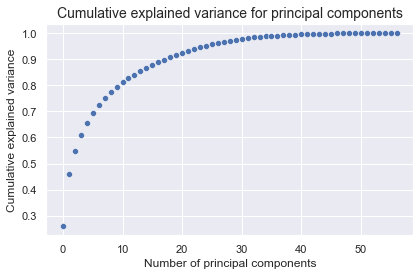

In [10]:
df = pd.read_csv('../bballref_data/pre_pca_2000_to_2020.csv', index_col=0)
pca = PCA(random_state=seed)
pca.fit(df)

cumulative_exp_var = pca.explained_variance_ratio_.cumsum()

s = sns.scatterplot(data=cumulative_exp_var)
s.set_title('Cumulative explained variance for principal components', fontsize=14)
s.set_xlabel('Number of principal components')
s.set_ylabel('Cumulative explained variance')
plt.tight_layout()

In [11]:
for i, exp_var in enumerate(cumulative_exp_var):
    print(i, ': ', exp_var)

0 :  0.2613260594964564
1 :  0.45859855131955696
2 :  0.5474428126667434
3 :  0.6083568266027245
4 :  0.6566127495976756
5 :  0.6927797049633941
6 :  0.723388236817791
7 :  0.7505605220045497
8 :  0.7738017019626897
9 :  0.7948572788907301
10 :  0.8114317923187947
11 :  0.8269490186436359
12 :  0.8412726554538948
13 :  0.855446896147291
14 :  0.8677738562928293
15 :  0.8793243763772791
16 :  0.8896242043227344
17 :  0.8991860022838531
18 :  0.9081779471690757
19 :  0.9169909561384206
20 :  0.9252210334646724
21 :  0.9327846218138663
22 :  0.9401929745523525
23 :  0.9463923605673766
24 :  0.952334608964662
25 :  0.9574474722100752
26 :  0.9625124801912376
27 :  0.966824775206113
28 :  0.9709677192142953
29 :  0.9748234180719012
30 :  0.9783195526421231
31 :  0.9812559337969176
32 :  0.9840651068060383
33 :  0.9865271466481175
34 :  0.9883040042505694
35 :  0.9899692251552576
36 :  0.991503038535349
37 :  0.992912502804137
38 :  0.9942235575027343
39 :  0.9952447797461879
40 :  0.9961430

### Thresholds
- 90% : 19
- 95% : 25
- 99% : 37
- 99.9% : 48

## Run pca with 99% var

In [12]:
pca = PCA(0.99, random_state=seed)
df = pd.read_csv('../bballref_data/pre_pca_2000_to_2020.csv', index_col=0)
pca_data = pca.fit_transform(df)
print(pca.n_components_)
df_pca = pd.DataFrame(pca_data, index=df.index, columns=[f'pc_{n}' for n in range(pca.n_components_)])
df_pca.to_csv('../bballref_data/pca99_2000_to_2020.csv')

37


# Worksheet below

## Add back in Charges drawn as data starts in 2000

In [14]:
df_master = pd.read_csv('bballref_data/master_raw_nba_data.csv', index_col=0)
df_master.shape

(11162, 92)

In [24]:
df_master_2000 = df_master.loc[df.index, :]
df_master_2000.shape

df = df.merge(df_master_2000['drawn_offensive'], left_index=True, right_index=True)

(6542, 92)

In [26]:
df.shape
df['drawn_offensive'].isna().sum()

(6542, 66)

1486